# STAT207 Final Project - All Star or Bum?


 1. Albert Chen 
 2. Josh Fajardo 
 3. Shray Srivastava 
 4. Justin Starks 

In [31]:
#Imports here
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## 1. Introduction

Research Introduction & Motivation

This model can be built to appeal to various audiences. The motivation of creating this model can aid sports analysts in their predictions of NBA All-Stars in the upcoming season, sport betters who want to bet on potential all stars for the upcoming NBA season, and even NBA players to see how well they need to play to become an All-Star. In the context of predicting NBA All-Stars, the "positives" would be the players who are selected as All-Stars, and the "negatives" would be those who are not selected. Since the goal of our model is to predict NBA All-Stars, we believe that those would utilize this model would prefer a model that would be better at classifying positive, or All-Stars, in this case. According to Sara Brown of MIT, "programmers choose a machine learning model to use, supply the data, and let the computer model train itself to find patterns or make predictions" (Machine Learning, explained, 2021). If this is the case would we prefer our model to be better at predicting the wrong outcome? Furthermore a potential user of this model can be a sports better, according to Neil Sahota, a professor at UC Irvine, "AI, with its unparalleled ability to analyze vast datasets and discern patterns beyond human capability, is emerging as the new MVP in this field" (The Game Changer: How AI Is Transforming The World Of Sports Gambling, 2024). 

Research Goal Statement

## 2. Dataset Discussion

In [32]:
per_game_stats = pd.read_csv('NBA_PG_Stats.csv')
per_game_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,2,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,achiupr01
2,3,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,achiupr01
3,4,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
4,5,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01


In [33]:
per_game_stats.shape[0]

735

In [34]:
advanced_stats = pd.read_csv('NBA_PG_ADV.csv')
advanced_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,0.512,0.276,...,0.0,0.4,0.4,0.048,NaN,-1.4,-0.2,-1.6,0.0,achiupr01
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,0.564,0.167,...,1.2,1.8,3.0,0.122,NaN,-1.9,0.5,-1.4,0.2,achiupr01
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01


In [35]:
advanced_stats.shape[0]

735

We found these csv files from Sports-Reference.com. This file was download on 4/17/2024, and the player per game stats were found on https://www.basketball-reference.com/leagues/NBA_2024_per_game.html and the advanced statistics were found on https://www.basketball-reference.com/leagues/NBA_2024_advanced.html. In these specific datasets, rows represent NBA players, the NBA uses cameras and Second Spectrum software tracks the movements of every player on the court and the basketball 25 times per second and records player statistics. The dataset could potentially not account all observations. Some players are referred as two-way players, and spend some time in the NBA or G-League. These players might not be included in the dataset. However, this will not likely have a big effect on the dataset because it's unlikely that a two-way player is going to be an All-Star. Our response variable is going to be All-Stars. These players are selected by fans for their fantastic performance throughout the season. The explanatory variables we intend to use are points, rebounds, assist, steals+blocks, Win Shares, and usage. Points are the total number of points a player scores in a game. This is one of the most direct measures of a player's offensive contributions on the court. Points can be scored through field goals, three-point shots, and free throws. Rebounds are recorded whenever a player retrieves the ball after a missed shot that hits the rim or backboard. Rebounds are classified into two categories: Offenseive and Defensive rebounds. An assist is credited to a player who passes the ball to a teammate in a way that leads to a score. This statistic is a key indicator of a player’s ability to distribute the ball and set up teammates for scoring opportunities. A steal occurs when a defensive player legally takes the ball away from an offensive player, which leads to a change in possession. A block is recorded when a defensive player legally deflects an offensive player's shot attempt, preventing the ball from going into the basket. Adding steals and blocks together gives a combined measure of a player’s defensive plays that directly interrupt the opponent’s scoring attempts. Win Shares is an advanced statistic that estimates the number of wins contributed by a player to their team’s total success. It combines various aspects of play (offense and defense) into a single number that quantifies a player's overall impact on winning games. It is calculated using player, team, and league statistics in both offensive and defensive dimensions.Usage rate is an estimate of the percentage of team plays used by a player while they were on the floor. It is a measure of how often a player attempts to score, assists on a basket, or commits a turnover. High usage rates can indicate that a player has a significant role in their team's offense. We chose to focus on these variables because we believe they will help accurately predict All-Stars.

## 3. Dataset Cleaning

Missing Values Detection and Cleaning for Per Game Statitics and Advanced Statistics

For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season. 

In [36]:
per_game_stats = per_game_stats[[ 'Player' , 'Tm', 'Pos' , 'PTS' , 'TRB' , 'AST' , 'STL' , 'BLK' ]]
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,C,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,PF,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...,...
730,Thaddeus Young,PHO,PF,2.3,2.8,0.7,0.5,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [37]:
per_game_stats = per_game_stats.dropna()
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,C,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,PF,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...,...
730,Thaddeus Young,PHO,PF,2.3,2.8,0.7,0.5,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [38]:
advanced_stats = advanced_stats[['Player', 'WS' , 'USG%']]
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
1,Precious Achiuwa,0.4,21.2
2,Precious Achiuwa,3.0,14.0
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
...,...,...,...
730,Thaddeus Young,0.3,12.8
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


In [39]:
advanced_stats = advanced_stats.dropna()
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
1,Precious Achiuwa,0.4,21.2
2,Precious Achiuwa,3.0,14.0
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
...,...,...,...
730,Thaddeus Young,0.3,12.8
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season. 

In [40]:
per_game_stats.drop_duplicates(subset='Player', keep='first', inplace=True)
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
7,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9
8,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5
...,...,...,...,...,...,...,...,...
728,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [41]:
advanced_stats.drop_duplicates(subset = 'Player' , keep = 'first' , inplace = True)
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
7,Santi Aldama,2.4,17.9
8,Nickeil Alexander-Walker,4.3,14.8
...,...,...,...
728,Thaddeus Young,1.3,12.6
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


In [42]:
#Merging advanced stats and per_game_stats
final_df = pd.merge(per_game_stats , advanced_stats , on = 'Player' , how = 'outer')
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8
...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9


After dropping the duplicates from players being traded throughout the season, we ended up with a merged dataframe of all of our explanatory variables. However, after using the dropna command no rows were removed from both datasets. We dropped 118 observations however because they were traded and were duplicated in the datasets. By doing this, it ensures the analysis is based on complete data without any other potential roadblocks that could skew our prediction. Some pros of removing rows with missing values ensures that the analysis is based on complete data, which would later one avoid potential errors that stems from missing values. A con from dropping row with missing values is that it may reduce the sample size and potentially lead to a loss of information, especially if the missing data is not random.

In [43]:
allstars= ["Bam Adebayo", "Giannis Antetokounmpo", "Tyrese Haliburton", "Damian Lillard", "Jayson Tatum", "Paolo Banchero", "Scottie Barnes", "Jaylen Brown", "Jalen Brunson", "Tyrese Maxey", "Donovan Mitchell", "Julius Randle", "Trae Young", "Joel Embiid", "Karl-Anthony Towns", "Kawhi Leonard", "Paul George", "Anthony Edwards", "Anthony Davis", "Stephen Curry", "Devin Booker", "Nikola Jokic", "LeBron James", "Shai Gilgeous-Alexander", "Kevin Durant", "Luka Doncic"]
final_df['isAllStar'] = final_df['Player'].isin(allstars).replace({True: 'Yes', False: 'No'})
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9,No
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No
...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6,No
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5,Yes
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9,No
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9,No


In [44]:
final_df['isAllStar'].value_counts()

isAllStar
No     546
Yes     26
Name: count, dtype: int64

In [45]:
num_yes = final_df[final_df["isAllStar"]=="Yes"]
num_yes

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
10,Giannis Antetokounmpo,MIL,PF,30.4,11.5,6.5,1.2,1.1,13.2,33.0,Yes
24,Paolo Banchero,ORL,PF,22.6,6.9,5.4,0.9,0.6,5.3,29.7,Yes
29,Scottie Barnes,TOR,SG,19.9,8.2,6.1,1.3,1.5,4.3,24.8,Yes
53,Devin Booker,PHO,PG,27.1,4.5,6.9,0.9,0.4,9.2,29.8,Yes
70,Jaylen Brown,BOS,SF,23.0,5.5,3.6,1.2,0.5,5.9,28.9,Yes
75,Jalen Brunson,NYK,PG,28.7,3.6,6.7,0.9,0.2,11.2,32.5,Yes
113,Stephen Curry,GSW,PG,26.4,4.5,5.1,0.7,0.4,7.2,31.3,Yes
115,Anthony Davis,LAL,C,24.7,12.6,3.5,1.2,2.3,11.8,26.7,Yes
127,Luka Doncic,DAL,PG,33.9,9.2,9.8,1.4,0.5,12.0,36.0,Yes


Finally, we added our binary response variable column "Is All Star" using who we know made the all star team from this past year.

## 4. Preliminary Analysis

Relationships between the Response Variable and the Explanatory Variables

All of our numerical explanatory variables had a strong association with the response variable as you can see that there is clearly separation between the IQR boxes in all of our box plots. While none of our explanatory variables had "weak relationships" with our response variable, blocks and total rebounds appeared to have the weakest associations/relationships with the response variable as there was less separation between IQR boxes than the rest of the explanatory variables. Our Categorical explanatory varaible also had a strong relationship with the response variable as we can see that at least two of the bars across positions were of differing heights suggesting there is an association.

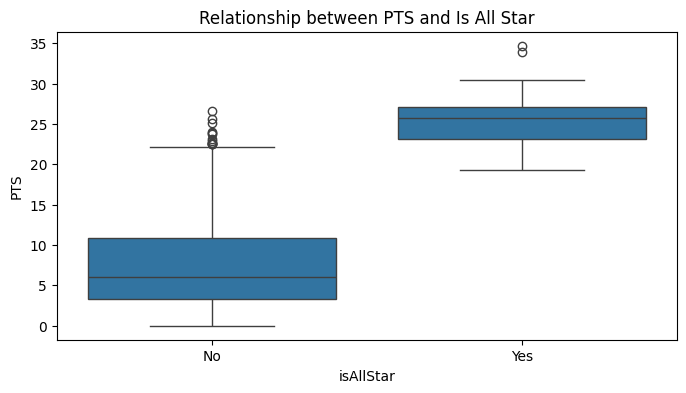

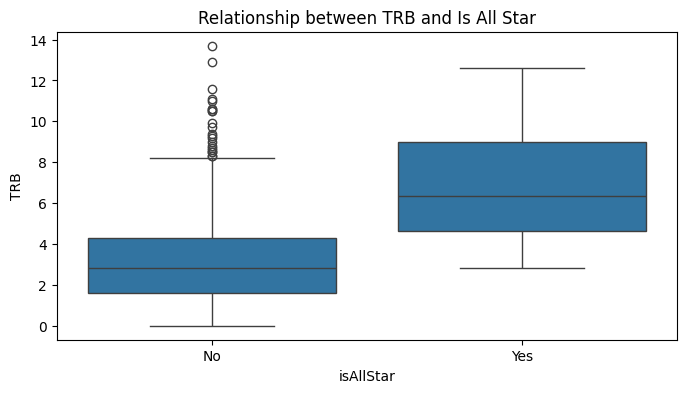

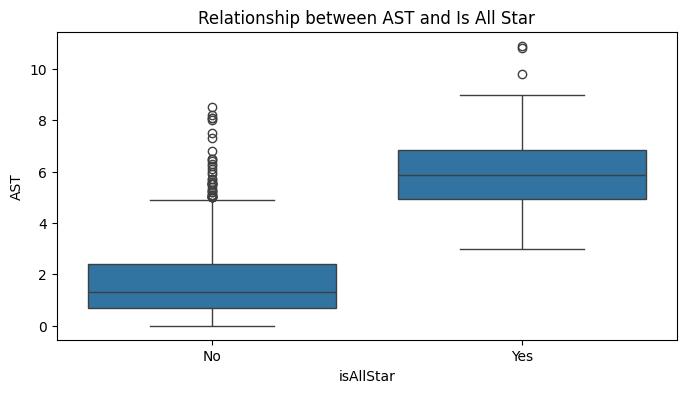

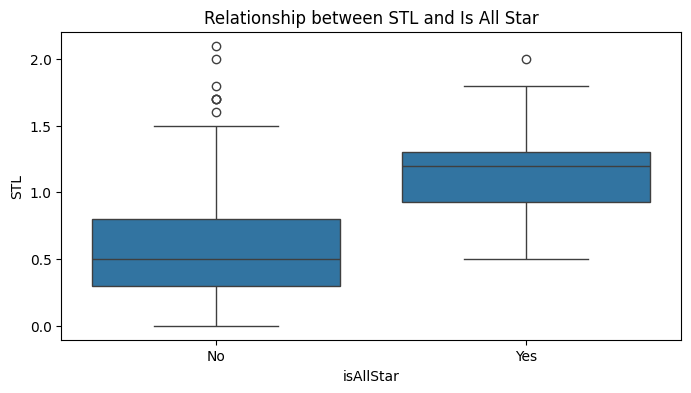

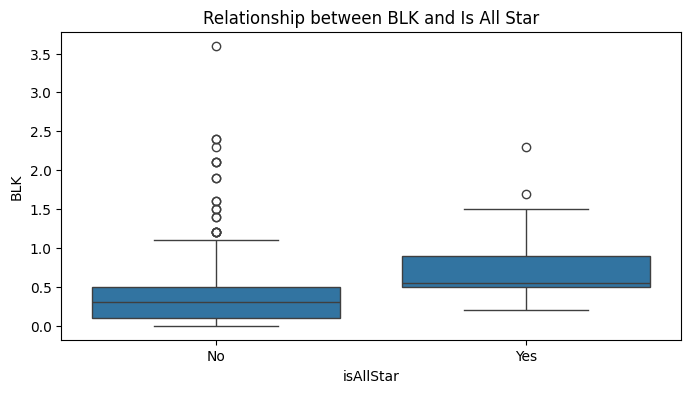

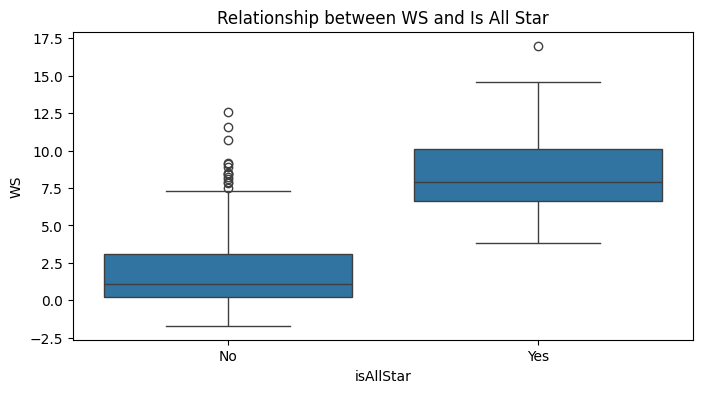

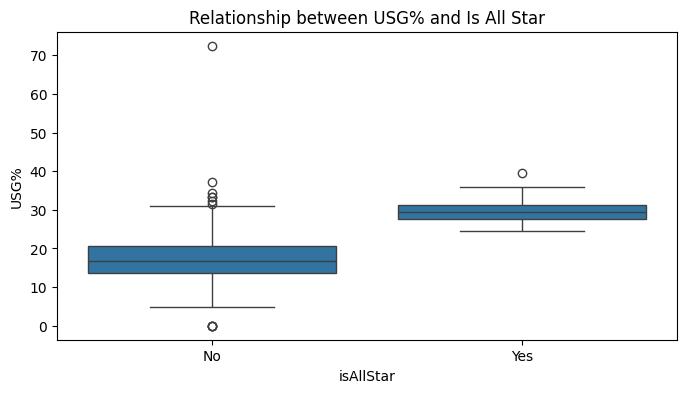

In [46]:


exp_variables = final_df.select_dtypes(include=[np.number]).columns.tolist()
for var in exp_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='isAllStar', y=var, data=final_df)
    plt.title(f'Relationship between {var} and Is All Star')
    plt.show()


In [47]:
temp = pd.crosstab(final_df['Pos'], final_df['isAllStar'], normalize='index')
temp

isAllStar,No,Yes
Pos,,
C,0.957447,0.042553
C-PF,1.000000,0.000000
PF,0.926606,0.073394
PF-C,1.000000,0.000000
PF-SF,1.000000,0.000000
PG,0.913462,0.086538
PG-SG,1.000000,0.000000
SF,0.983471,0.016529
SF-PF,1.000000,0.000000


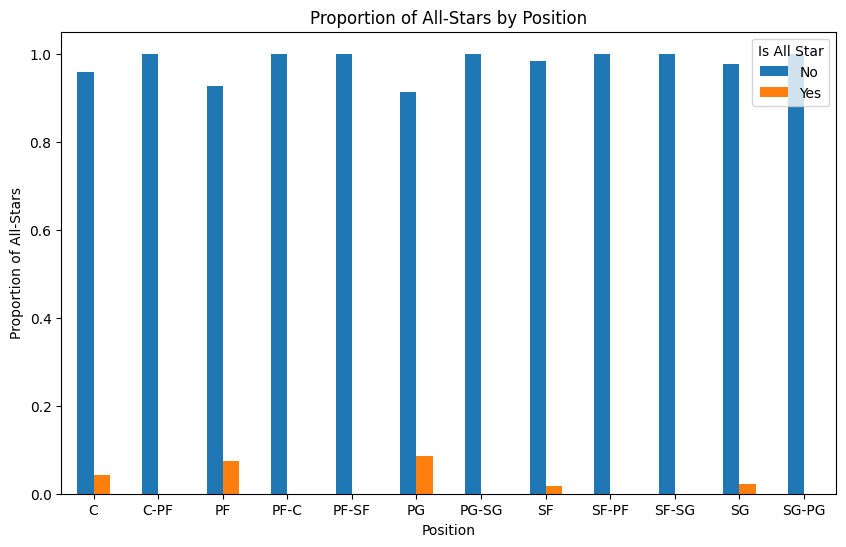

In [48]:
ax = temp.plot.bar(figsize=(10, 6))  
plt.title('Proportion of All-Stars by Position')
plt.xlabel('Position')
plt.ylabel('Proportion of All-Stars')
plt.legend(title='Is All Star', loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Relationships between Explanatory Variable Pairs

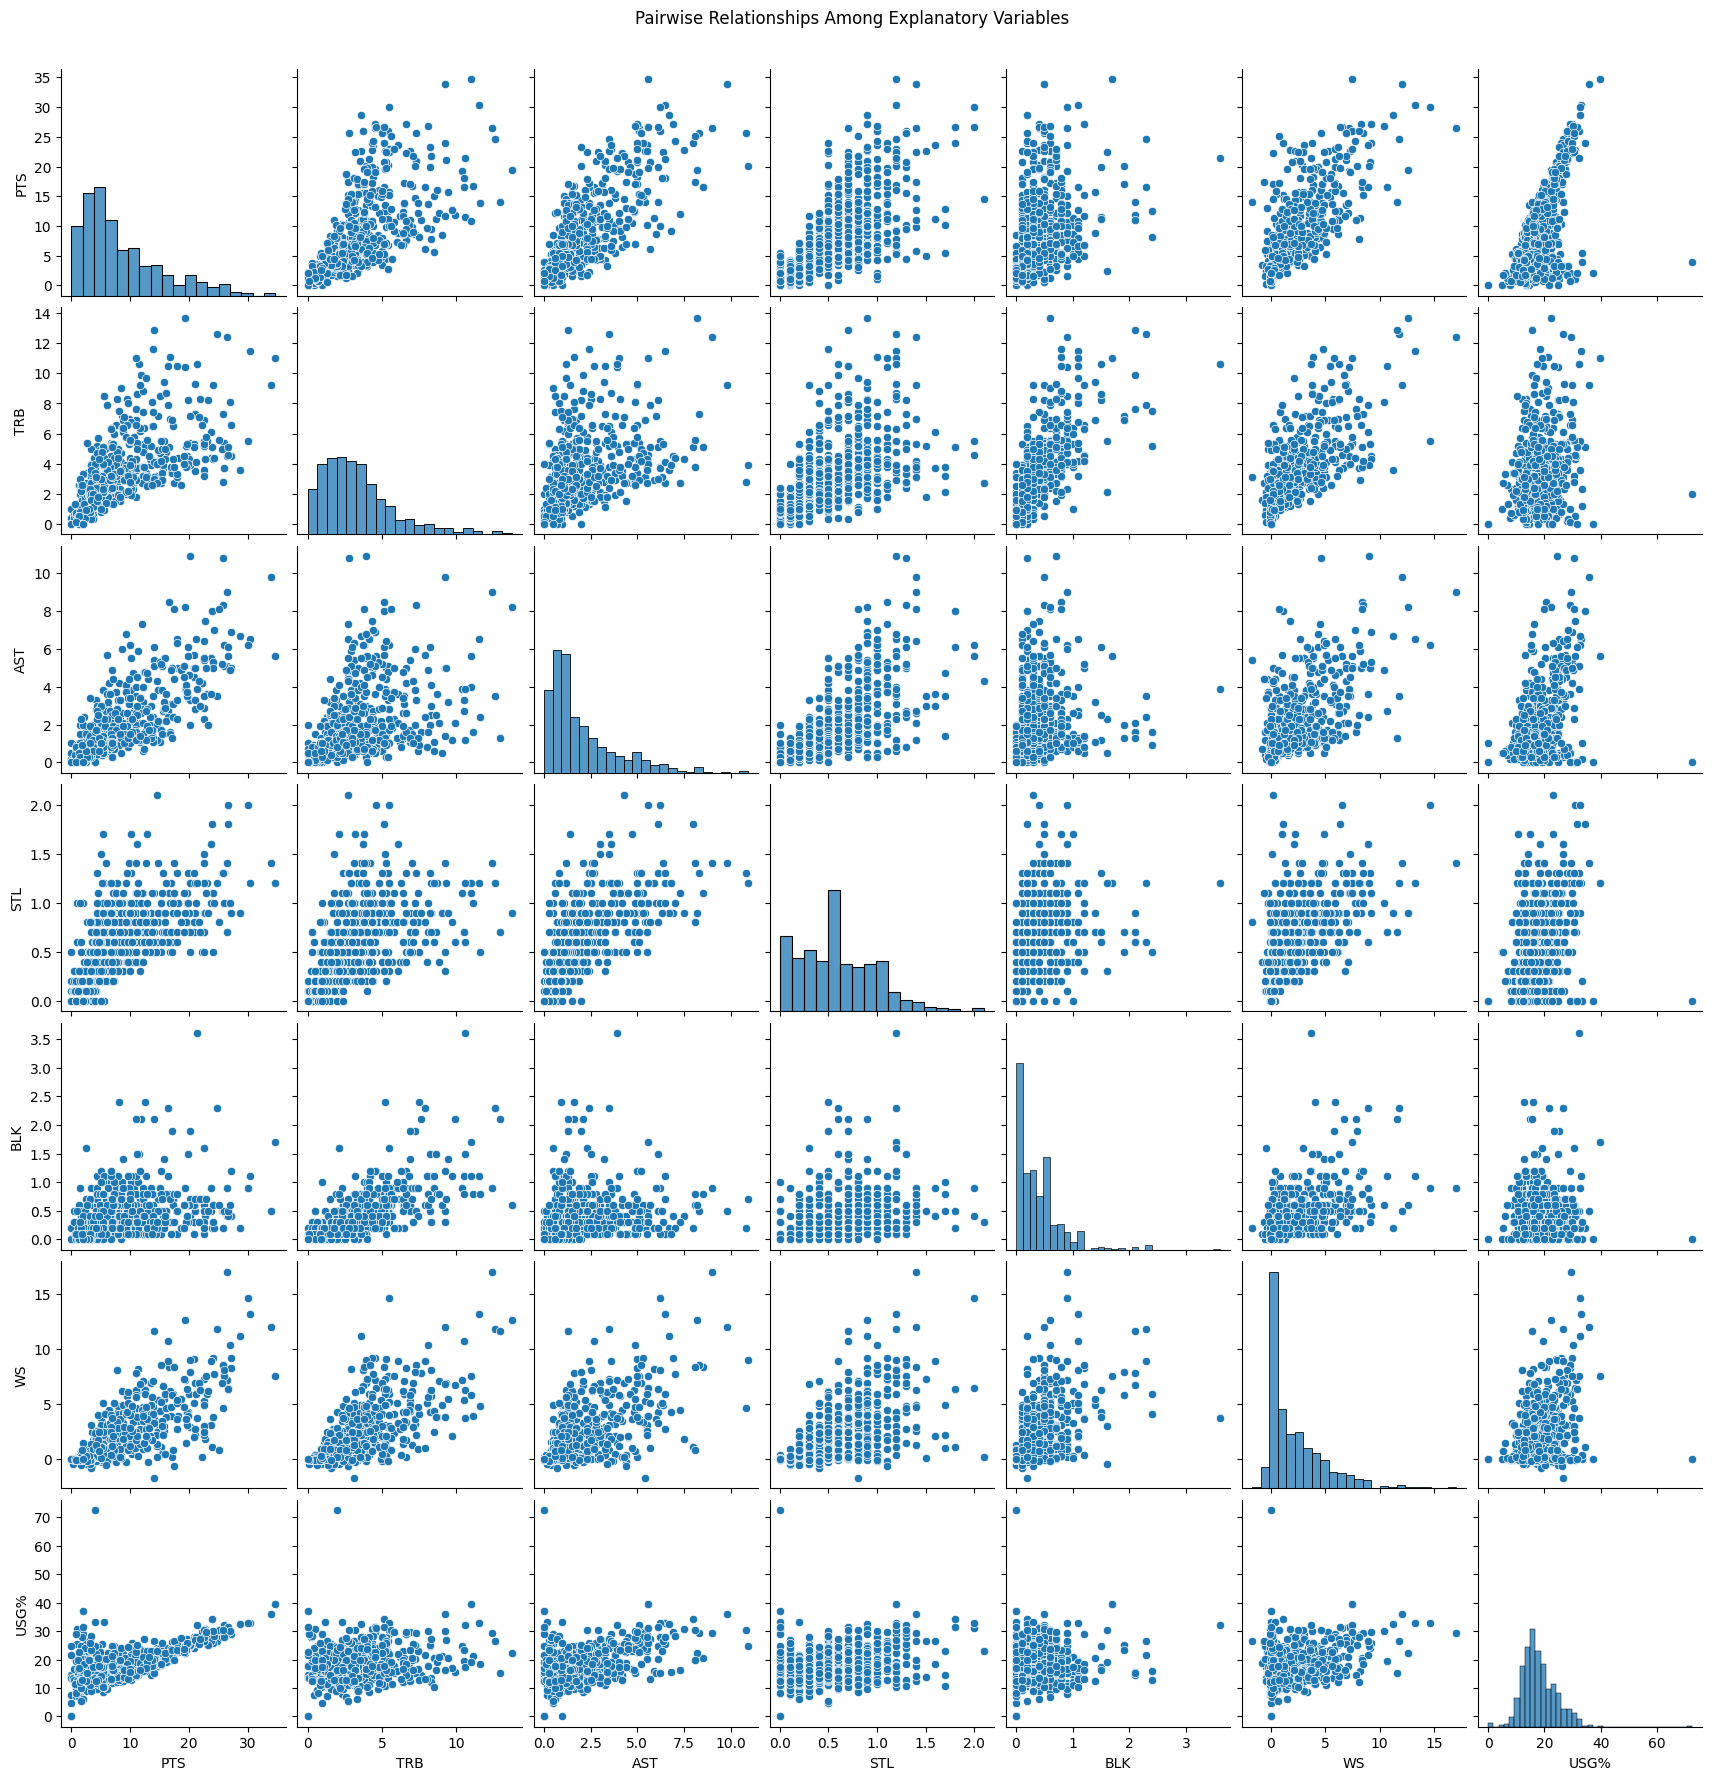

In [49]:
selected_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
sns.pairplot(final_df[selected_columns])
plt.suptitle('Pairwise Relationships Among Explanatory Variables', y=1.02)
plt.show()


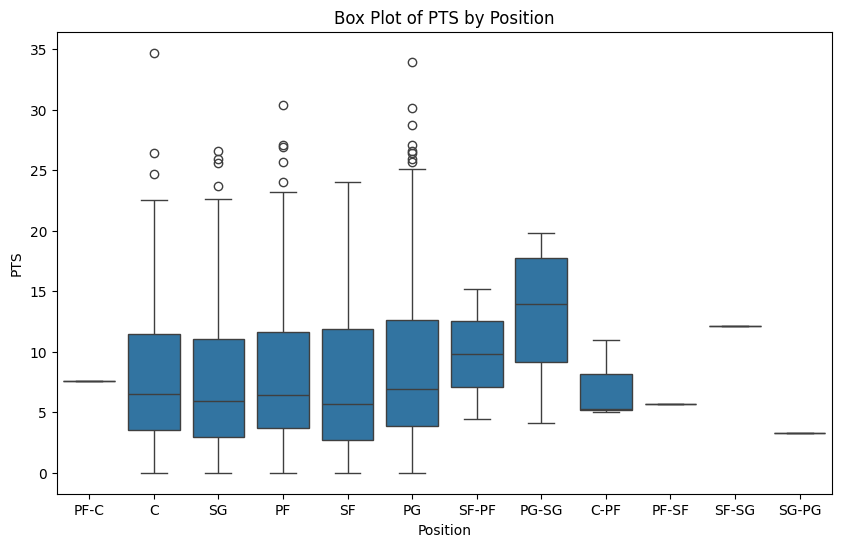

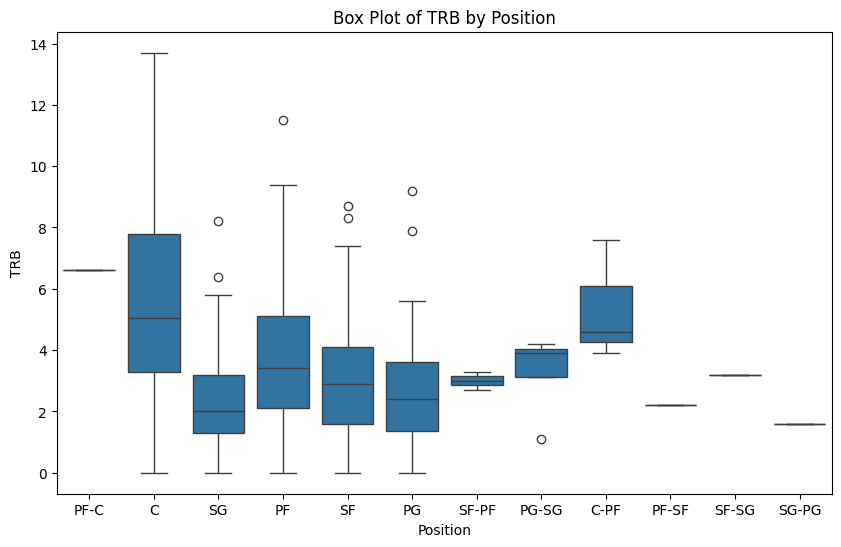

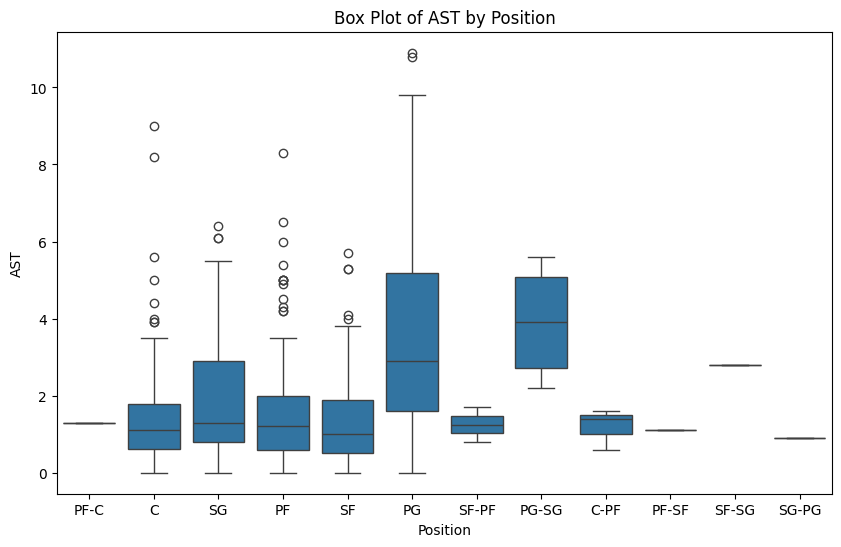

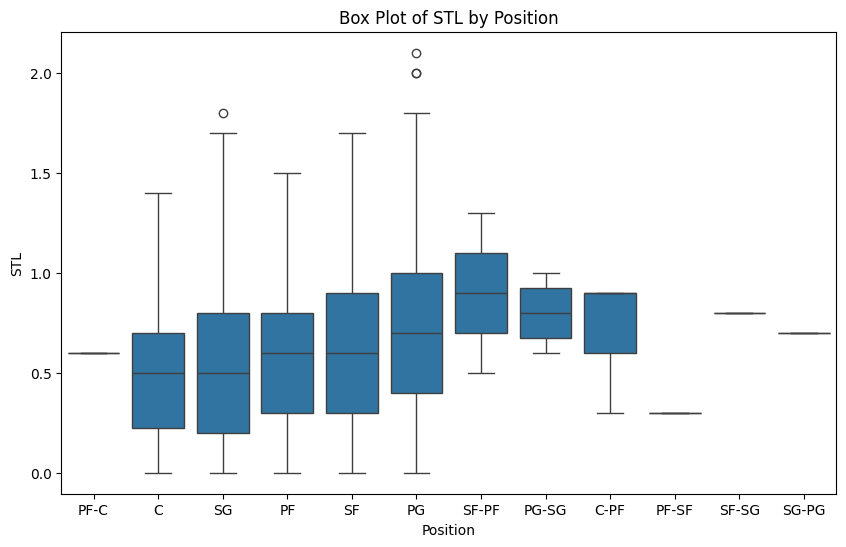

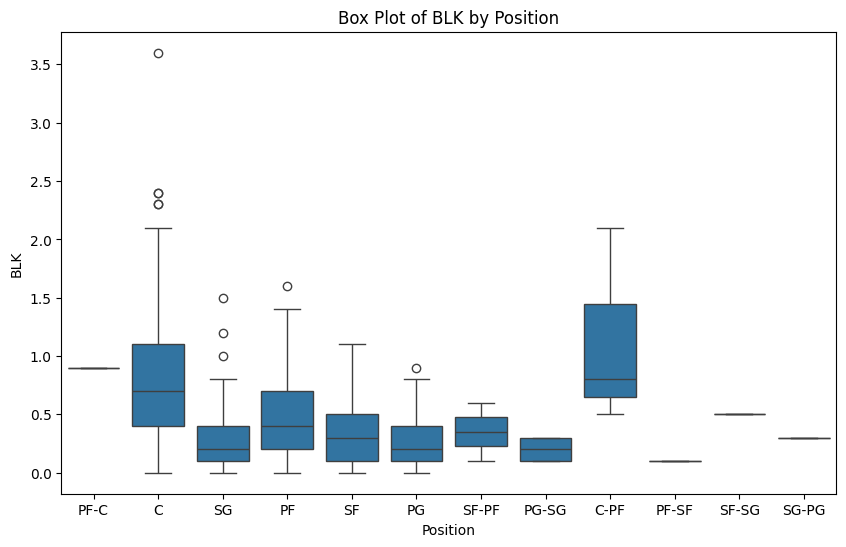

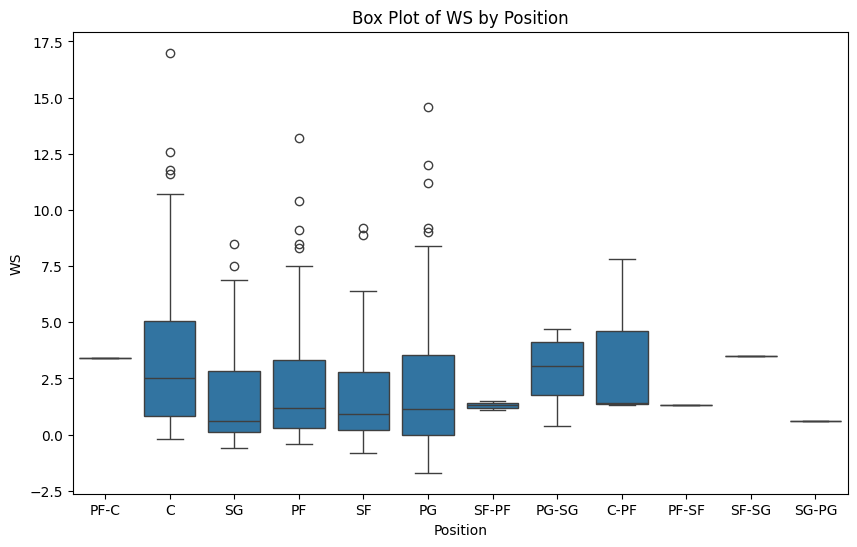

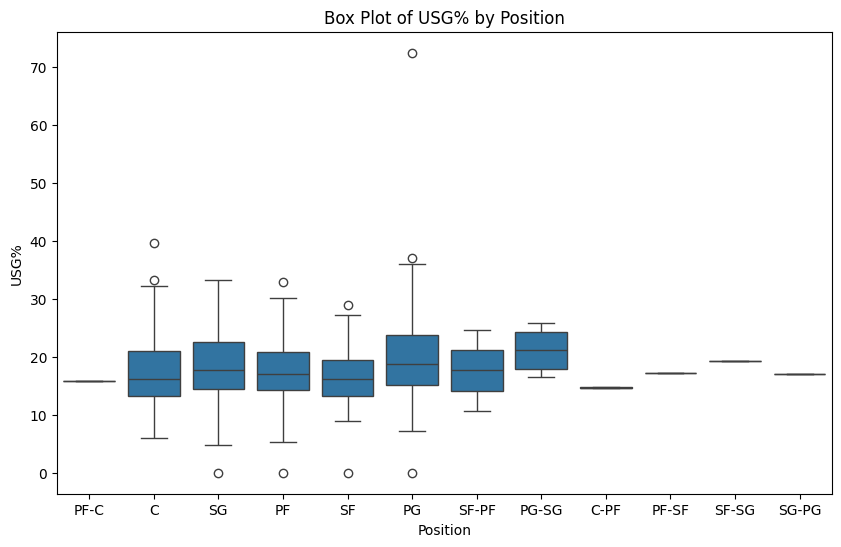

In [50]:
variables = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pos', y=var, data=final_df)
    plt.title(f'Box Plot of {var} by Position')
    plt.xlabel('Position')
    plt.ylabel(var)
    plt.show()

In [51]:
final_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']].corr()

,PTS,TRB,AST,STL,BLK,WS,USG%
PTS,1.000000,0.664955,0.781182,0.678790,0.402661,0.759278,0.623389
TRB,0.664955,1.000000,0.451020,0.517584,0.700256,0.709344,0.268465
AST,0.781182,0.451020,1.000000,0.667829,0.190506,0.629958,0.456307
STL,0.678790,0.517584,0.667829,1.000000,0.357374,0.579261,0.269716
BLK,0.402661,0.700256,0.190506,0.357374,1.000000,0.515448,0.096202
WS,0.759278,0.709344,0.629958,0.579261,0.515448,1.000000,0.322115
USG%,0.623389,0.268465,0.456307,0.269716,0.096202,0.322115,1.000000


There were pairs of explanatory variables that had strong associations with each other such as (AST,PTS) (PTS,WS) (TRB,BLK) (TRB,WS) (TRB, Pos) (AST, POS) and (BLK,Pos). We can see in the correlation matrix that there are some strong linear relationships between variables that could lead to issues with multicolineatiry. Additionally in our boxplots you can see that there are at least 2 IQR boxes that are well-separated.

In [52]:
final_df['isAllStar']

0       No
1      Yes
2       No
3       No
4       No
      ... 
567     No
568    Yes
569     No
570     No
571     No
Name: isAllStar, Length: 572, dtype: object

In [53]:
final_df['y'] = final_df['isAllStar'].map({'Yes': 1, 'No': 0})
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar,y
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9,No,0
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes,1
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No,0
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No,0
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6,No,0
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5,Yes,1
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9,No,0
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9,No,0


In [54]:
# import pandas as pd
# import statsmodels.api as sm
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Display unique values in 'isAllStar' before conversion
# print("Unique values before conversion:", final_df['isAllStar'].unique())

# # Convert 'isAllStar' to 0 and 1 if it's not already
# final_df['isAllStar'] = final_df['isAllStar'].map({'Yes': 1, 'No': 0})

# # Check if there are still any NaNs or unexpected values
# print("Unique values after conversion:", final_df['isAllStar'].unique())

# # Handle NaNs if any (example: fill with the most frequent value if 'isAllStar' is mostly binary)
# if final_df['isAllStar'].isna().any():
#     mode_value = final_df['isAllStar'].mode()[0]
#     final_df['isAllStar'].fillna(mode_value, inplace=True)

# # Confirm no NaN values
# print("NaN counts in 'isAllStar':", final_df['isAllStar'].isna().sum())

# # Prepare data for logistic regression
# X = final_df[['PTS'] + [f'PTS_{col}' for col in pos_dummies.columns]]
# X = sm.add_constant(X)  # Adding constant
# y = final_df['isAllStar']  # Should be correctly formatted now

# # Build the model
# model = sm.Logit(y, X)
# results = model.fit()
# print(results.summary())

# # Visualization of interaction effects
# plt.figure(figsize=(10, 6))
# for col in pos_dummies.columns:
#     sns.regplot(x='PTS', y='isAllStar', data=final_df, line_kws={'label': f'Interaction with {col}'})
# plt.legend()
# plt.title('Interaction Effects of Points Scored by Position on All-Star Status')
# plt.xlabel('Points Scored (PTS)')
# plt.ylabel('Probability of Being All Star')
# plt.show()


In [55]:
temp['isAllStar'] = final_df['isAllStar'].map({'yes': 1, 'no': 0})
temp

isAllStar,No,Yes,isAllStar
Pos,,,
C,0.957447,0.042553,NaN
C-PF,1.000000,0.000000,NaN
PF,0.926606,0.073394,NaN
PF-C,1.000000,0.000000,NaN
PF-SF,1.000000,0.000000,NaN
PG,0.913462,0.086538,NaN
PG-SG,1.000000,0.000000,NaN
SF,0.983471,0.016529,NaN
SF-PF,1.000000,0.000000,NaN


## 5. Model Data Preprocessing

In [56]:
# Create the features matrix (X) and target array (y)
X = final_df.drop('y', axis=1)  # Assuming 'isAllStar' is the response variable
y = final_df['y']


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%'] 
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [58]:
X = pd.get_dummies(X, columns=['Pos'], drop_first=True, dtype=int)


In [59]:
X

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar,...,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PG
0,Precious Achiuwa,TOT,-0.121326,1.331655,-0.374724,0.022427,1.204313,0.448914,-0.358587,No,...,0,1,0,0,0,0,0,0,0,0
1,Bam Adebayo,MIA,1.602947,2.899801,1.014334,1.305252,1.204313,1.880485,1.073203,Yes,...,0,0,0,0,0,0,0,0,0,0
2,Ochai Agbaji,TOT,-0.386598,-0.236492,-0.481575,0.022427,0.477660,-0.794293,-0.756307,No,...,0,0,0,0,0,0,0,0,1,0
3,Santi Aldama,MEM,0.335533,1.001519,0.159529,0.278992,1.204313,0.072184,-0.040412,No,...,1,0,0,0,0,0,0,0,0,0
4,Nickeil Alexander-Walker,MIN,-0.062376,-0.566628,0.266379,0.535557,0.235442,0.787970,-0.533584,No,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,-0.622396,-0.112691,-0.161023,0.278992,-0.491210,-0.342218,-0.883577,No,...,1,0,0,0,0,0,0,0,0,0
568,Trae Young,ATL,2.546138,-0.236492,4.700681,1.818382,-0.491210,0.900989,1.964095,Yes,...,0,0,0,1,0,0,0,0,0,0
569,Omer Yurtseven,UTA,-0.563447,0.382513,-0.748702,-1.003833,-0.006775,-0.568255,-0.040412,No,...,0,0,0,0,0,0,0,0,0,0
570,Cody Zeller,NOP,-0.976093,-0.319026,-0.588426,-1.003833,-0.733428,-0.530582,-0.835851,No,...,0,0,0,0,0,0,0,0,0,0


## 6. Feature Selection with k-Fold Cross-Validation

In [60]:
l1_ratios = [0.1, 0.25, 0.5, 0.75, 0.9]
lambda_values = np.logspace(-4, 4, 100)
C_values = 1 / lambda_values


auc_scores = {l1_ratio: [] for l1_ratio in l1_ratios}
X_num = X.select_dtypes(include=[np.number])
for l1_ratio in l1_ratios:
    for C in C_values:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=C, l1_ratio=l1_ratio, max_iter=10000)
        cv_auc = cross_val_score(model, X_num, y, cv=5, scoring='roc_auc').mean()
        auc_scores[l1_ratio].append(cv_auc)

best_auc, best_lambda, best_l1_ratio = 0, 0, 0
for l1_ratio, scores in auc_scores.items():
    max_auc = max(scores)
    if max_auc > best_auc:
        best_auc = max_auc
        best_lambda = lambda_values[scores.index(max_auc)]
        best_l1_ratio = l1_ratio

best_C = 1 / best_lambda


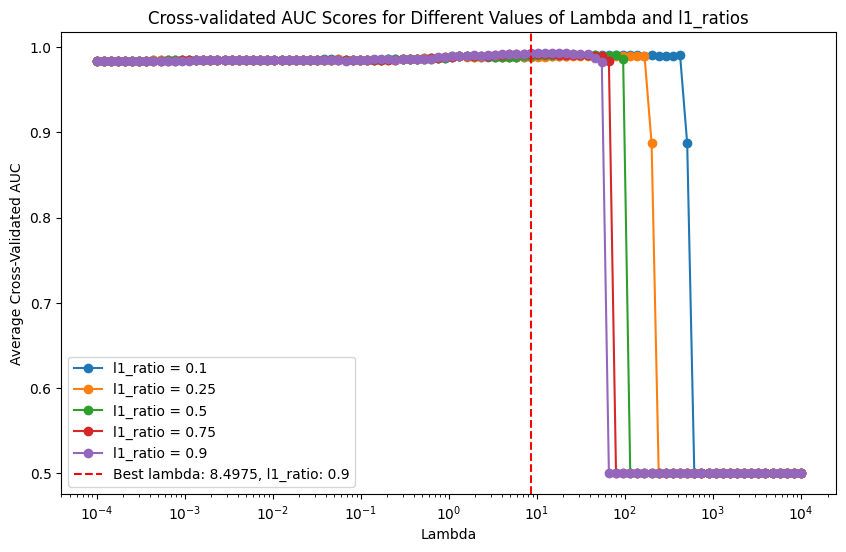

In [61]:

plt.figure(figsize=(10, 6))
for l1_ratio, scores in auc_scores.items():
    plt.plot(lambda_values, scores, marker='o', label=f'l1_ratio = {l1_ratio}')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Average Cross-Validated AUC')
plt.title('Cross-validated AUC Scores for Different Values of Lambda and l1_ratios')
plt.axvline(x=best_lambda, color='red', linestyle='--', label=f'Best lambda: {best_lambda:.4f}, l1_ratio: {best_l1_ratio}')
plt.legend()
plt.show()



In [62]:
print(f"The best lambda value is: {best_lambda}")
print(f"The best l1_ratio value is: {best_l1_ratio}")
print(f"This combination gives an average cross-validated AUC of: {best_auc}")

The best lambda value is: 8.497534359086455
The best l1_ratio value is: 0.9
This combination gives an average cross-validated AUC of: 0.993179872115652


We chose to use Elastic Net as our regularization model because of its ability to handle multicollinearity the best and also allows us to reap the benefits of Lasso's feature selection and Ridge's complexity. We saw in our heatmap that multicollinearity may be an issue but also feel that all of the predictors we chose are expected to be useful in determining whether a player will be an all star or not so we want to avoid zeroing out anything if possible. The problem with only choosing Lasso is that if there are 2 predictors that are equally good in predicting the target variable, Lasso might arbitrarily select one of these features, while Elastic Net tends to include all of them. We saw that after testing many combinations of l1 ratio's and lambdas that our best model had a AUC score of .993 which is phenomenal.

## 7. Best Model Discussion

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.20, random_state=207)

In [66]:
best_model = LogisticRegression(penalty='elasticnet', solver='saga', C=best_C , l1_ratio=best_l1_ratio, max_iter=1000)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.11768119524349968, l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga')

In [67]:
intercept = best_model.intercept_[0]
coefficients = best_model.coef_[0]
feature_names = X_num.columns

equation_terms = [f"{coef:.3f}*{feature_names[i]}" for i, coef in enumerate(coefficients) if coef != 0]
equation = " + ".join(equation_terms)

logistic_regression_equation = f"Logistic Regression Equation: P(Y=1) = 1 / (1 + exp(-({intercept:.3f} + {equation})))"
print(logistic_regression_equation)

Logistic Regression Equation: P(Y=1) = 1 / (1 + exp(-(-4.870 + 1.278*PTS + 0.276*AST + 0.422*WS)))


## 8. Additional Analysis/Insight

## 9. Conclusion

## References